<a href="https://colab.research.google.com/github/ufukhurriyetoglu/vector-normalization-for-vector-search/blob/main/understanding_effect_of_l2_normalization_on_vector_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding effect of l2_normalization on Vector Search

In [ ]:
import pandas as pd
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA

# What is Vector Search ?

## Definition of a Vector

A vector is a list of items, a list of 3 apples, 4 oranges, and 2 strawberries for example.

fruit_vector -> [apple, apple, apple, orange, orange, orange, orange, strawberry, strawberry]





In [2]:
fruit_vector = ["apple", "apple", "apple", "orange", "orange", "orange", "orange", "strawberry", "strawberry"]

Let's transform this vector to count vector of items where each column holds
count of each fruit:

In [3]:
fruit_df = pd.DataFrame([[3, 4, 2]], columns = ["apple", "orange", "strawberry"])

Here the first of the table is the count vector:

In [4]:
fruit_df.iloc[0].to_numpy()

array([3, 4, 2])

# Visualizing Vectors

In [17]:
def two_d_vector_space(reduced_dims):
    colors = ("red", "green", "blue", "orange")
    groups = ("P", "Q", "U", "V")

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    # We need to create spines in order to have a centered axis
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Hide part of the border by setting colour to none
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Do not show ticks on both sides of the axis
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Set a limit so there is some room for the points
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)

    # Go through each set of points and plot them on a scatter plot
    for data, color, group in zip(reduced_dims, colors, groups):
        x, y = data
        ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

    plt.title('2D vector space')
    plt.legend(loc=2)
    plt.show()

def vector_space(a, b, c):
    p = np.array(a)
    q = np.array(b)
    v = np.array(c)
    points = np.vstack((p, q, v))
    two_d_vector_space(points)


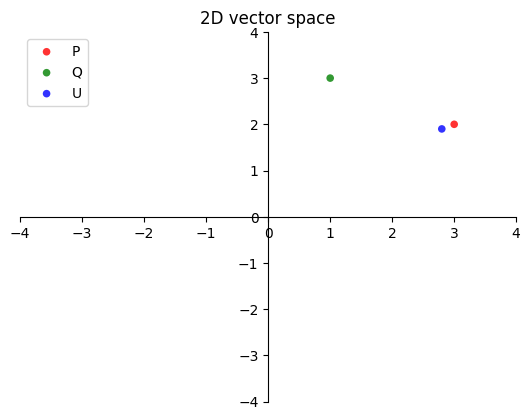

In [18]:
vector_space([3, 2], [1,3], [2.8, 1.9])

## Visualizing three vectors with same unit vector but in different scales (magnitudes)

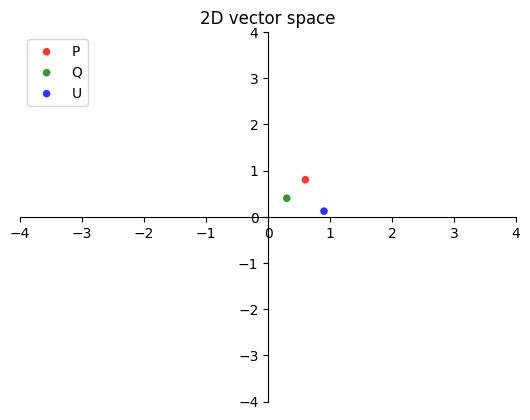

In [20]:
vector_space([0.6, 0.8], [0.3, 0.4], [0.9, 0.12])

# Vector Similarity

After transforming the available data we will be able to check similarity of different data points
by leveraging the vector similarity approaches. This will enable us to develop recommender systems,
search systems, or help us better understand data features to train better ML models in terms of generalizations
abnd robustness.

## Vector Representation

In real life AI applications, especially considering search applications over unstructured data, first we convert the unstructured data to vector of numeric values, and then index properly to later
search for input queries to find the closest matches.

There are several techniques to vectorize the data lets start with the simplest one which is count vectorization.

## Count Vectorization

Consider the text: `I love text representations because they make vector search possible and more efficient. How lucky I am :)`
